<a href="https://colab.research.google.com/github/phice421/Hiperpar-metros/blob/main/Hiperpar%C3%A2metros_aluno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import GridSearchCV
from google_drive_downloader import GoogleDriveDownloader as gdd


# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

# Hiperparâmetros

Alguns parâmetros de algortitmos de Machine Learning não são treinados, mas influenciam diretamente nas métricas do nosso modelo. Esses parâmetros são conhecidos como Hiperparâmetros.

Por exemplo na Arvore de Decisões temos o número de camadas no sklearn.

Uma forma de trabalhar com os hiperparâmetros é com o **Grid Search**, que é uma técnica de busca exaustiva para encontrar os melhores valores para os hiperparâmetros.


Para essa técnica vamos usar a validação cruzada, onde iremos encontrar os melhores parâmetros para o nosso modelo usando apenas o conjunto de treinamento. A imagem a seguir ilustra a divisão do conjunto de dados quando usamos a validação cruzada:



<center>
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500">

fonte: https://scikit-learn.org/stable/modules/cross_validation.html

O objetivo do Grid Search é fazer uma busca para encontar os melhores hiperparâmetros do nosso moelo para posteriormente retreinar o modelo usando o resultado obtido por ele. A imagem a seguir ilustra esse processo:




<center>
<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="500">

fonte: https://scikit-learn.org/stable/modules/cross_validation.html

Vamos fazer um exemplo com um conjunto de dados para classificação com o objetivo de verificar os conceitos de hiperparâmetros:

## Exemplo Regressão

Vamos agora ver um exemplo com modelos de regressão

### Tarefa #1: Recebendo os dados

In [ ]:
# Importando o pandas
import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '1miwQK6nydj2VaAff9xFOPG5SMmnNVvb1'
gdd.download_file_from_google_drive(file_id=data_google_id,
                                    dest_path = './data_regressao.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
dados_reg = pd.read_csv("data_regressao.csv")

32.0 KiB Done.


### Tarefa #2: Analise Exploratória dos Dados

In [ ]:
dados_reg.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [ ]:
dados_reg.shape

(1030, 9)

In [ ]:
dados_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [ ]:
dados_reg.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [ ]:
dados_reg.describe()
# MODELOS DE ARVORE NÃO SERIA NECESSARIO APLICAR A NORMALIZAÇÃO OU PADRONIZAÇÃO DOS DADOS, NO GRAFICO OS DADOS ESTARIAM NO MESMO LUGAR

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


array([[<Axes: title={'center': 'Cement (component 1)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Fly Ash (component 3)(kg in a m^3 mixture)'}>],
       [<Axes: title={'center': 'Water  (component 4)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Superplasticizer (component 5)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'}>],
       [<Axes: title={'center': 'Fine Aggregate (component 7)(kg in a m^3 mixture)'}>,
        <Axes: title={'center': 'Age (day)'}>,
        <Axes: title={'center': 'Concrete compressive strength(MPa, megapascals) '}>]],
      dtype=object)

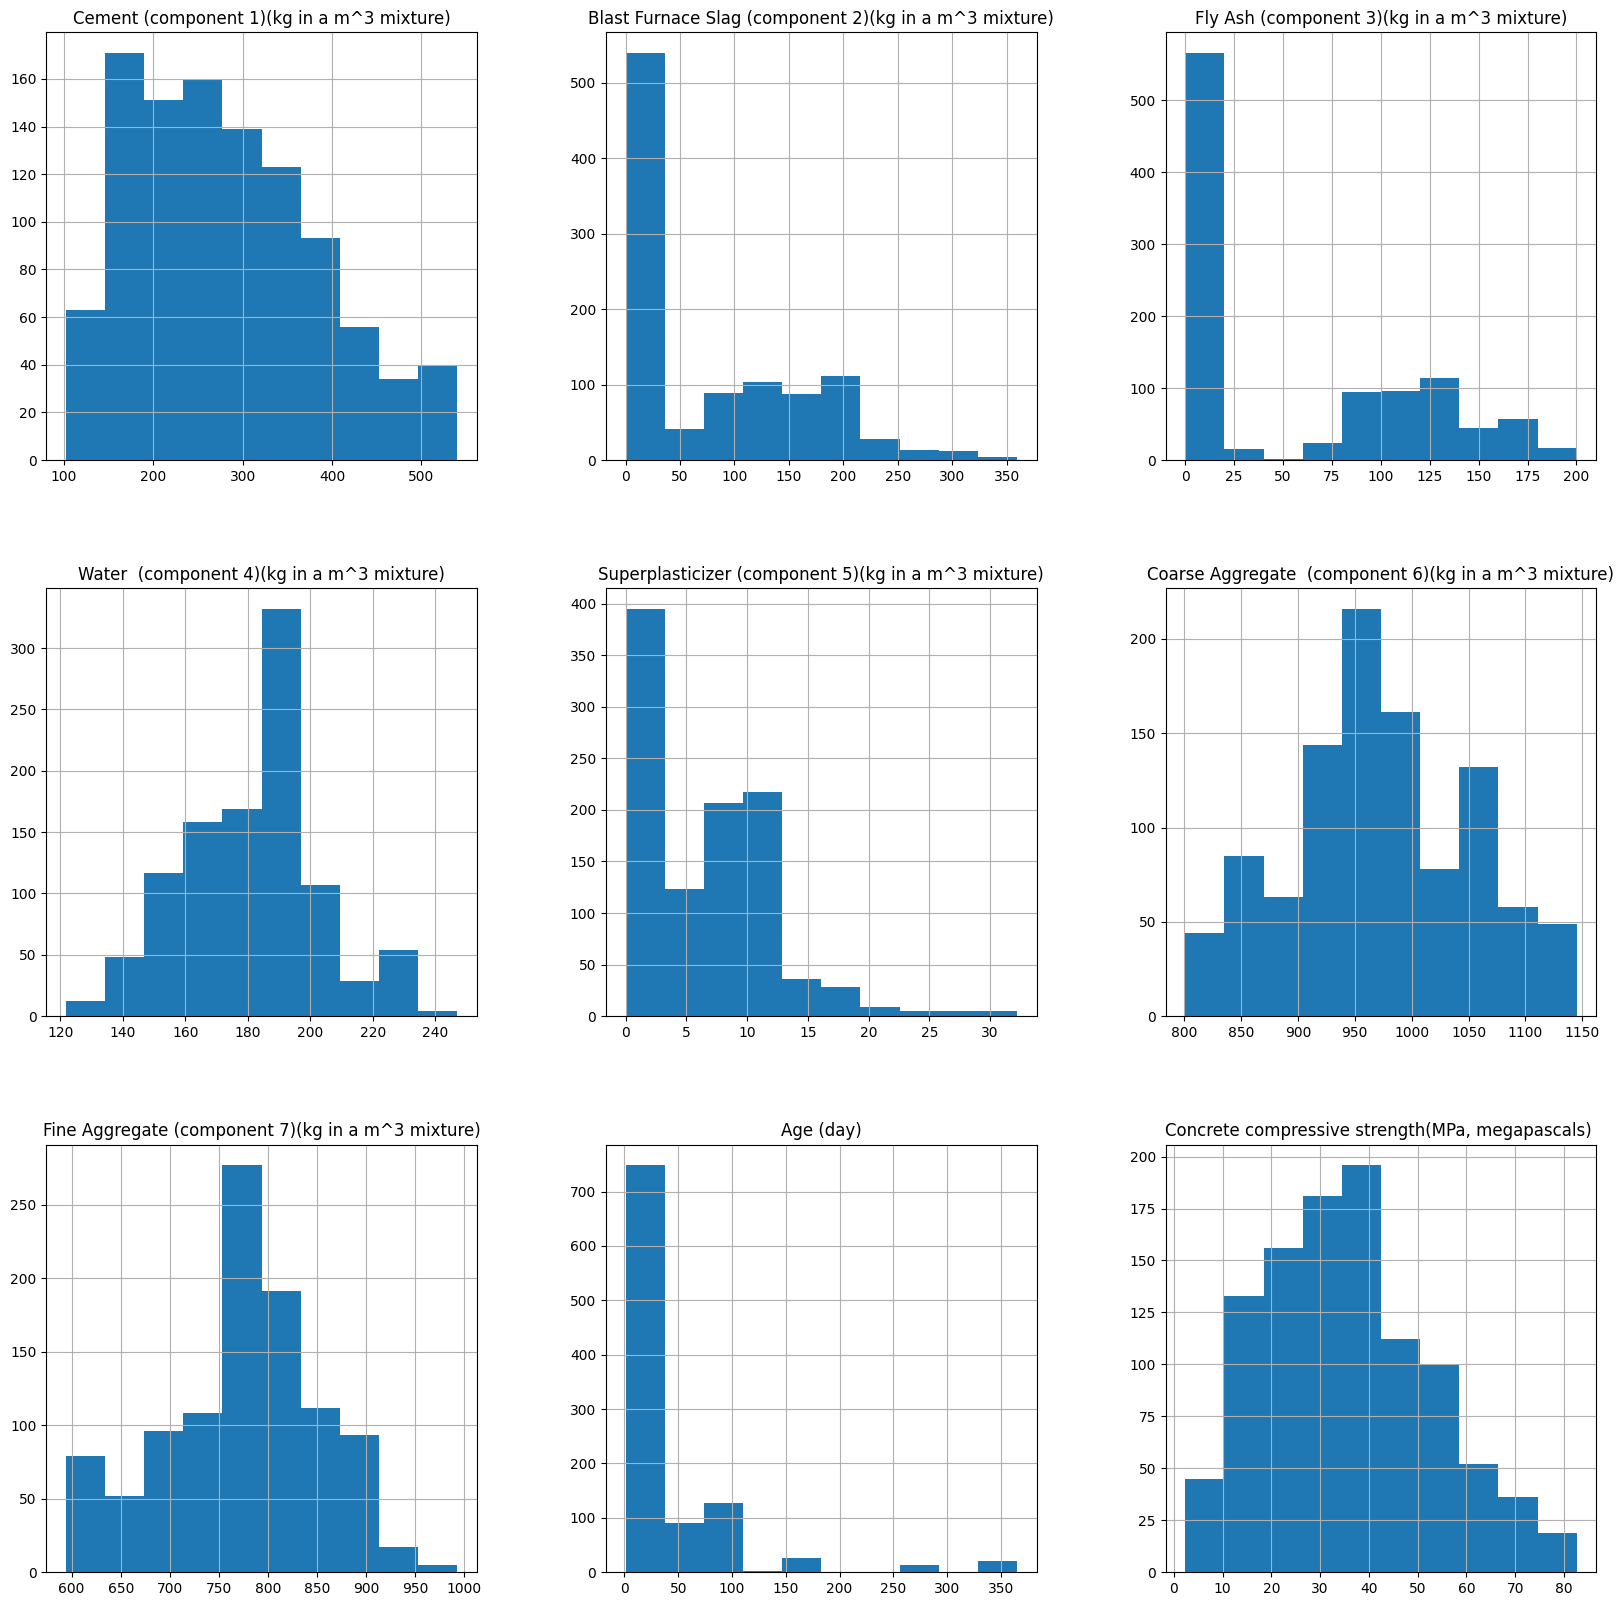

In [ ]:
dados_reg.hist(figsize=(20,20))

## Aplicando IA aos nossos dados

### Tarefa #1: Dividindo o conjunto de dados (Entrada/Saída e Treinamento/Teste)

In [ ]:
dados_reg.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
dados_reg.columns = ['Cement',
       'Blast Furnace Slag ',
       'Fly Ash ',
       'Water ',
       'Superplasticizer ',
       'Coarse Aggregate  ',
       'Fine Aggregate ', 'Age (day)',
       'Concrete compressive strength']

In [ ]:
# Dividindo os dados em entrada X e saída y
X = dados_reg.drop(columns=['Concrete compressive strength'])
y = dados_reg['Concrete compressive strength']

# Dividindo os dados em conjunto de treinamento e teste:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)

# Normalizando as entradas dos dados:
normalizacao = MinMaxScaler()
normalizacao.fit(X_train) # obteve os valores min e max de cada coluna

# Aplicando a normalização dos dados:
X_train_norm = normalizacao.transform(X_train)
X_test_norm = normalizacao.transform(X_test)

### Tarefa #2: Treinando os modelos

Vamos começar com a Regressão Linear. Para esse modelo não iremos usar nenhum hiperparâmetro.

In [ ]:
# Criando o modelo de Regressão Linear
modelo_RL = LinearRegression()

# Treinando o modelo
modelo_RL.fit(X_train_norm, y_train)

# Predições do modelo:
y_pred_RL = modelo_RL.predict(X_test_norm)

Árvore de Decisões para os modelos de Regressão:

In [ ]:
# Criar o modelo para o Grid Search
modelo = DecisionTreeRegressor()

# Informar os parâmetros para a execução do Grid Search
parametros = {'max_depth':range(2,21),
              'min_samples_split':range(2,11)}

# Criar o Grid Search para o modelo e os parâmetros criados anteriormente
modelo_GS = GridSearchCV(modelo, parametros)

# Fazer os treinamentos usando o k-fold cross validation
modelo_GS.fit(X_train_norm, y_train)

# Checando o "melhor" modelo
modelo_GS.best_params_

{'max_depth': 16, 'min_samples_split': 5}

In [ ]:
# Criando o modelo de Árvore de Decisão
modelo_AD = DecisionTreeRegressor(max_depth = 16, min_samples_split = 3)

# Treinando o modelo de Árvore de decisão
modelo_AD.fit(X_train_norm,y_train)

# Obtendo as predições do modelo de Árvore de decisão:
y_pred_AD = modelo_AD.predict(X_test_norm)

Modelo de Random Forest Regressor:

In [ ]:
# Criar o modelo para o Grid Search
modelo = RandomForestRegressor()

# Informar os parâmetros para a execução do Grid Search
parametros = {'max_depth':range(3,11),
              'min_samples_split':range(2,11)}

# Criar o Grid Search para o modelo e os parâmetros criados anteriormente
modelo_GS = GridSearchCV(modelo, parametros)

# Fazer os treinamentos usando o k-fold cross validation
modelo_GS.fit(X_train_norm, y_train)

# Checando o "melhor" modelo
modelo_GS.best_params_

KeyboardInterrupt: ignored

In [ ]:
# Criando o modelo de Rando Forest
modelo_RFR = DecisionTreeRegressor(max_depth = 10, min_samples_split = 3)

# Treinando o modelo:
modelo_RFR.fit(X_train_norm,y_train)

# Obtendo as predições do modelo de Árvore de decisão:
y_pred_RFR = modelo_AD.predict(X_test_norm)

Modelo de Gradient Boosting Regressor:

In [ ]:
# Criar o modelo para o Grid Search
modelo = GradientBoostingRegressor()

# Informar os parâmetros para a execução do Grid Search
parametros = {'max_depth':range(3,11),
              'min_samples_split':range(2,11)}

# Criar o Grid Search para o modelo e os parâmetros criados anteriormente
modelo_GS = GridSearchCV(modelo, parametros)

# Fazer os treinamentos usando o k-fold cross validation
modelo_GS.fit(X_train_norm, y_train)

# Checando o "melhor" modelo
modelo_GS.best_params_

{'max_depth': 5, 'min_samples_split': 10}

In [ ]:
modelo_GBR = GradientBoostingRegressor (max_depth=5,
                                        min_samples_split=10)

# Treinando o modelo
modelo_GBR.fit (X_train_norm, y_train)

# Obtendo as predições do modelo:
y_pred_GBR = modelo_GBR.predict(X_test_norm)

### Tarefa #3: Métricas de desempenho dos modelos

In [ ]:
predicoes_regressao = {'Regressão Linear' : y_pred_RL,
                       'Árvore de decisão' : y_pred_AD,
                       'Floresta Aleatória' : y_pred_RFR,
                       'Gradient Boosting Regressor' : y_pred_GBR}

In [ ]:
for nome_reg, y_pred in predicoes_regressao.items():
  print('='*30)
  print(nome_reg)
  print(f"MSE = {mean_squared_error(y_test, y_pred)}")
  print(f"MAE = {mean_absolute_error(y_test, y_pred)}")
  print(f"R2 = {r2_score(y_test, y_pred)}")

Regressão Linear
MSE = 109.75614063734916
MAE = 8.298641626767528
R2 = 0.5943642890037384
Árvore de decisão
MSE = 45.66819591652606
MAE = 4.261428343463172
R2 = 0.8312199115881374
Floresta Aleatória
MSE = 45.66819591652606
MAE = 4.261428343463172
R2 = 0.8312199115881374
Gradient Boosting Regressor
MSE = 24.307794521387077
MAE = 3.3046199032251438
R2 = 0.9101634819138442


O Melhor modelo seria o Gradient Boosting Regressor, e o pior é o regressão linear

## Exemplo Classificadores

### Tarefa #1: Recebendo os dados

In [ ]:
# Importando o pandas
import pandas as pd

# Recebendo os dados:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_google_id = '1Q1_W0UF4F6pOhNGHAxhC0YRKwvizZgRt'
gdd.download_file_from_google_drive(file_id=data_google_id,
                                    dest_path = './data_classificacao.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
dados_classificacao = pd.read_csv("data_classificacao.csv", sep = ',')

0.0 B Done.


### Tarefa #2: Analise Exploratória dos Dados

In [ ]:
dados_classificacao.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dados_classificacao.shape

(150, 6)

In [ ]:
dados_classificacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
dados_classificacao.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
dados_classificacao.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Tarefa#3: Tratamento dos dados

In [ ]:
dados_classificacao.drop(columns=['Id'], inplace = True)

## Aplicando IA aos nossos dados

### Tarefa #1: Dividindo o conjunto de dados (Entrada/Saída e Treinamento/Teste)

In [ ]:
# Dividindo os dados em entrada e saída (X e Y)
X = dados_classificacao.drop(columns=['Species'])
y = dados_classificacao['Species']

# Dividindo os dados de treinamento e de teste
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)

### Tarefa #2: Treinando os modelos

Vamos começar com o k-NN:

In [ ]:

# Criar o modelo para o Grid Search
modelo = KNeighborsClassifier()

# Informar os parâmetros para a execução do Grid Search
parametros = {'n_neighbors': range(3, 51)}

# Criar o Grid Search para o modelo e os parâmetros criados anteriormente
modelo_GS = GridSearchCV(modelo, parametros, cv=5)

# Fazer os treinamentos usando o k-fold cross-validation
modelo_GS.fit(X_train, y_train)

# Checando o "melhor" modelo
print("Melhores parâmetros encontrados:", modelo_GS.best_params_)

Melhores parâmetros encontrados: {'n_neighbors': 7}


In [ ]:
# Criando o modelo de KNN
KNN_clf = KNeighborsClassifier (n_neighbors = 7, )

# Treinando o modelo:
KNN_clf.fit(X_train,y_train)

# Obtendo as predições do modelo de KNN:
y_pred_KNN = KNN_clf.predict(X_test)

Árvore de Decisões:

In [ ]:
# Criar o modelo para o Grid Search
modelo = DecisionTreeClassifier()

# Informar os parâmetros para a execução do Grid Search
parametros = {'max_depth':range(2,20),
              'min_samples_split':range(2,10)}

# Criar o Grid Search para o modelo e os parâmetros criados anteriormente
modelo_GS = GridSearchCV(modelo, parametros, )

# Fazer os treinamentos usando o k-fold cross-validation
modelo_GS.fit(X_train, y_train)

# Checando o "melhor" modelo
print("Melhores parâmetros encontrados:", modelo_GS.best_params_)

Melhores parâmetros encontrados: {'max_depth': 4, 'min_samples_split': 6}


In [ ]:
# Criando o modelo de Árvore de Decisão
AD_clf = DecisionTreeClassifier(max_depth = 4, min_samples_split = 6)

# Treinando o modelo:
AD_clf.fit(X_train,y_train)

# Obtendo as predições do modelo de Árvore de decisão:
y_pred_AD = AD_clf.predict(X_test)

Random Forest:

In [ ]:
# Criar o modelo para o Grid Search
modelo = RandomForestClassifier()

# Informar os parâmetros para a execução do Grid Search
parametros = {'max_depth':range(2,10),
              'min_samples_split':range(2,10)}

# Criar o Grid Search para o modelo e os parâmetros criados anteriormente
modelo_GS = GridSearchCV(modelo, parametros, cv=5)

# Fazer os treinamentos usando o k-fold cross-validation
modelo_GS.fit(X_train, y_train)

# Checando o "melhor" modelo
print("Melhores parâmetros encontrados:", modelo_GS.best_params_)

Melhores parâmetros encontrados: {'max_depth': 2, 'min_samples_split': 3}


In [ ]:
# Criando o modelo de Random Forest
RF_clf = DecisionTreeClassifier(max_depth = 2, min_samples_split = 3)

# Treinando o modelo:
RF_clf.fit(X_train,y_train)

# Obtendo as predições do modelo de Árvore de decisão:
y_pred_RF = RF_clf.predict(X_test)

Gradient Boosting Classifier:




In [ ]:
# Criar o modelo para o Grid Search
modelo = GradientBoostingClassifier()

# Informar os parâmetros para a execução do Grid Search
parametros = {'max_depth':range(2,10),
              'min_samples_split':range(2,10)}

# Criar o Grid Search para o modelo e os parâmetros criados anteriormente
modelo_GS = GridSearchCV(modelo, parametros, cv=5)

# Fazer os treinamentos usando o k-fold cross-validation
modelo_GS.fit(X_train, y_train)

# Checando o "melhor" modelo
print("Melhores parâmetros encontrados:", modelo_GS.best_params_)

Melhores parâmetros encontrados: {'max_depth': 5, 'min_samples_split': 3}


In [ ]:
# Criando o modelo de Gradient boosting classifier
GBC_clf = DecisionTreeClassifier(max_depth = 5, min_samples_split = 3)

# Treinando o modelo:
GBC_clf.fit(X_train,y_train)

# Obtendo as predições do modelo de Gradient boosting classifier:
y_pred_GBC = GBC_clf.predict(X_test)

Support Vector Machine:

In [ ]:
# Criar o modelo para o Grid Search
modelo = SVC()

# Informar os parâmetros para a execução do Grid Search
parametros = {'kernel':['rbf', 'poly', 'linear','sigmoid']}

# Criar o Grid Search para o modelo e os parâmetros criados anteriormente
modelo_GS = GridSearchCV(modelo, parametros, cv=5)

# Fazer os treinamentos usando o k-fold cross-validation
modelo_GS.fit(X_train, y_train)

# Checando o "melhor" modelo
print("Melhores parâmetros encontrados:", modelo_GS.best_params_)

Melhores parâmetros encontrados: {'kernel': 'poly'}


In [ ]:
# Criando o modelo de Support Vector Machine
modelo_svc = SVC(kernel='poly')

# Treinamento do modelo
modelo_svc.fit(X_train, y_train)

#predições do modelo para cj de teste:
y_pred_SVC = modelo_svc.predict(X_test)

## Tarefa #3: Métricas de desempenho do modelo

In [ ]:
predicoes_classificacao = {'KNN':y_pred_KNN,
                           'Árvore de decisão':y_pred_AD,
                           'Random Forest':y_pred_RF,
                           'Gradient Boosting Classifier':y_pred_GBC,
                           'SVC':y_pred_SVC}

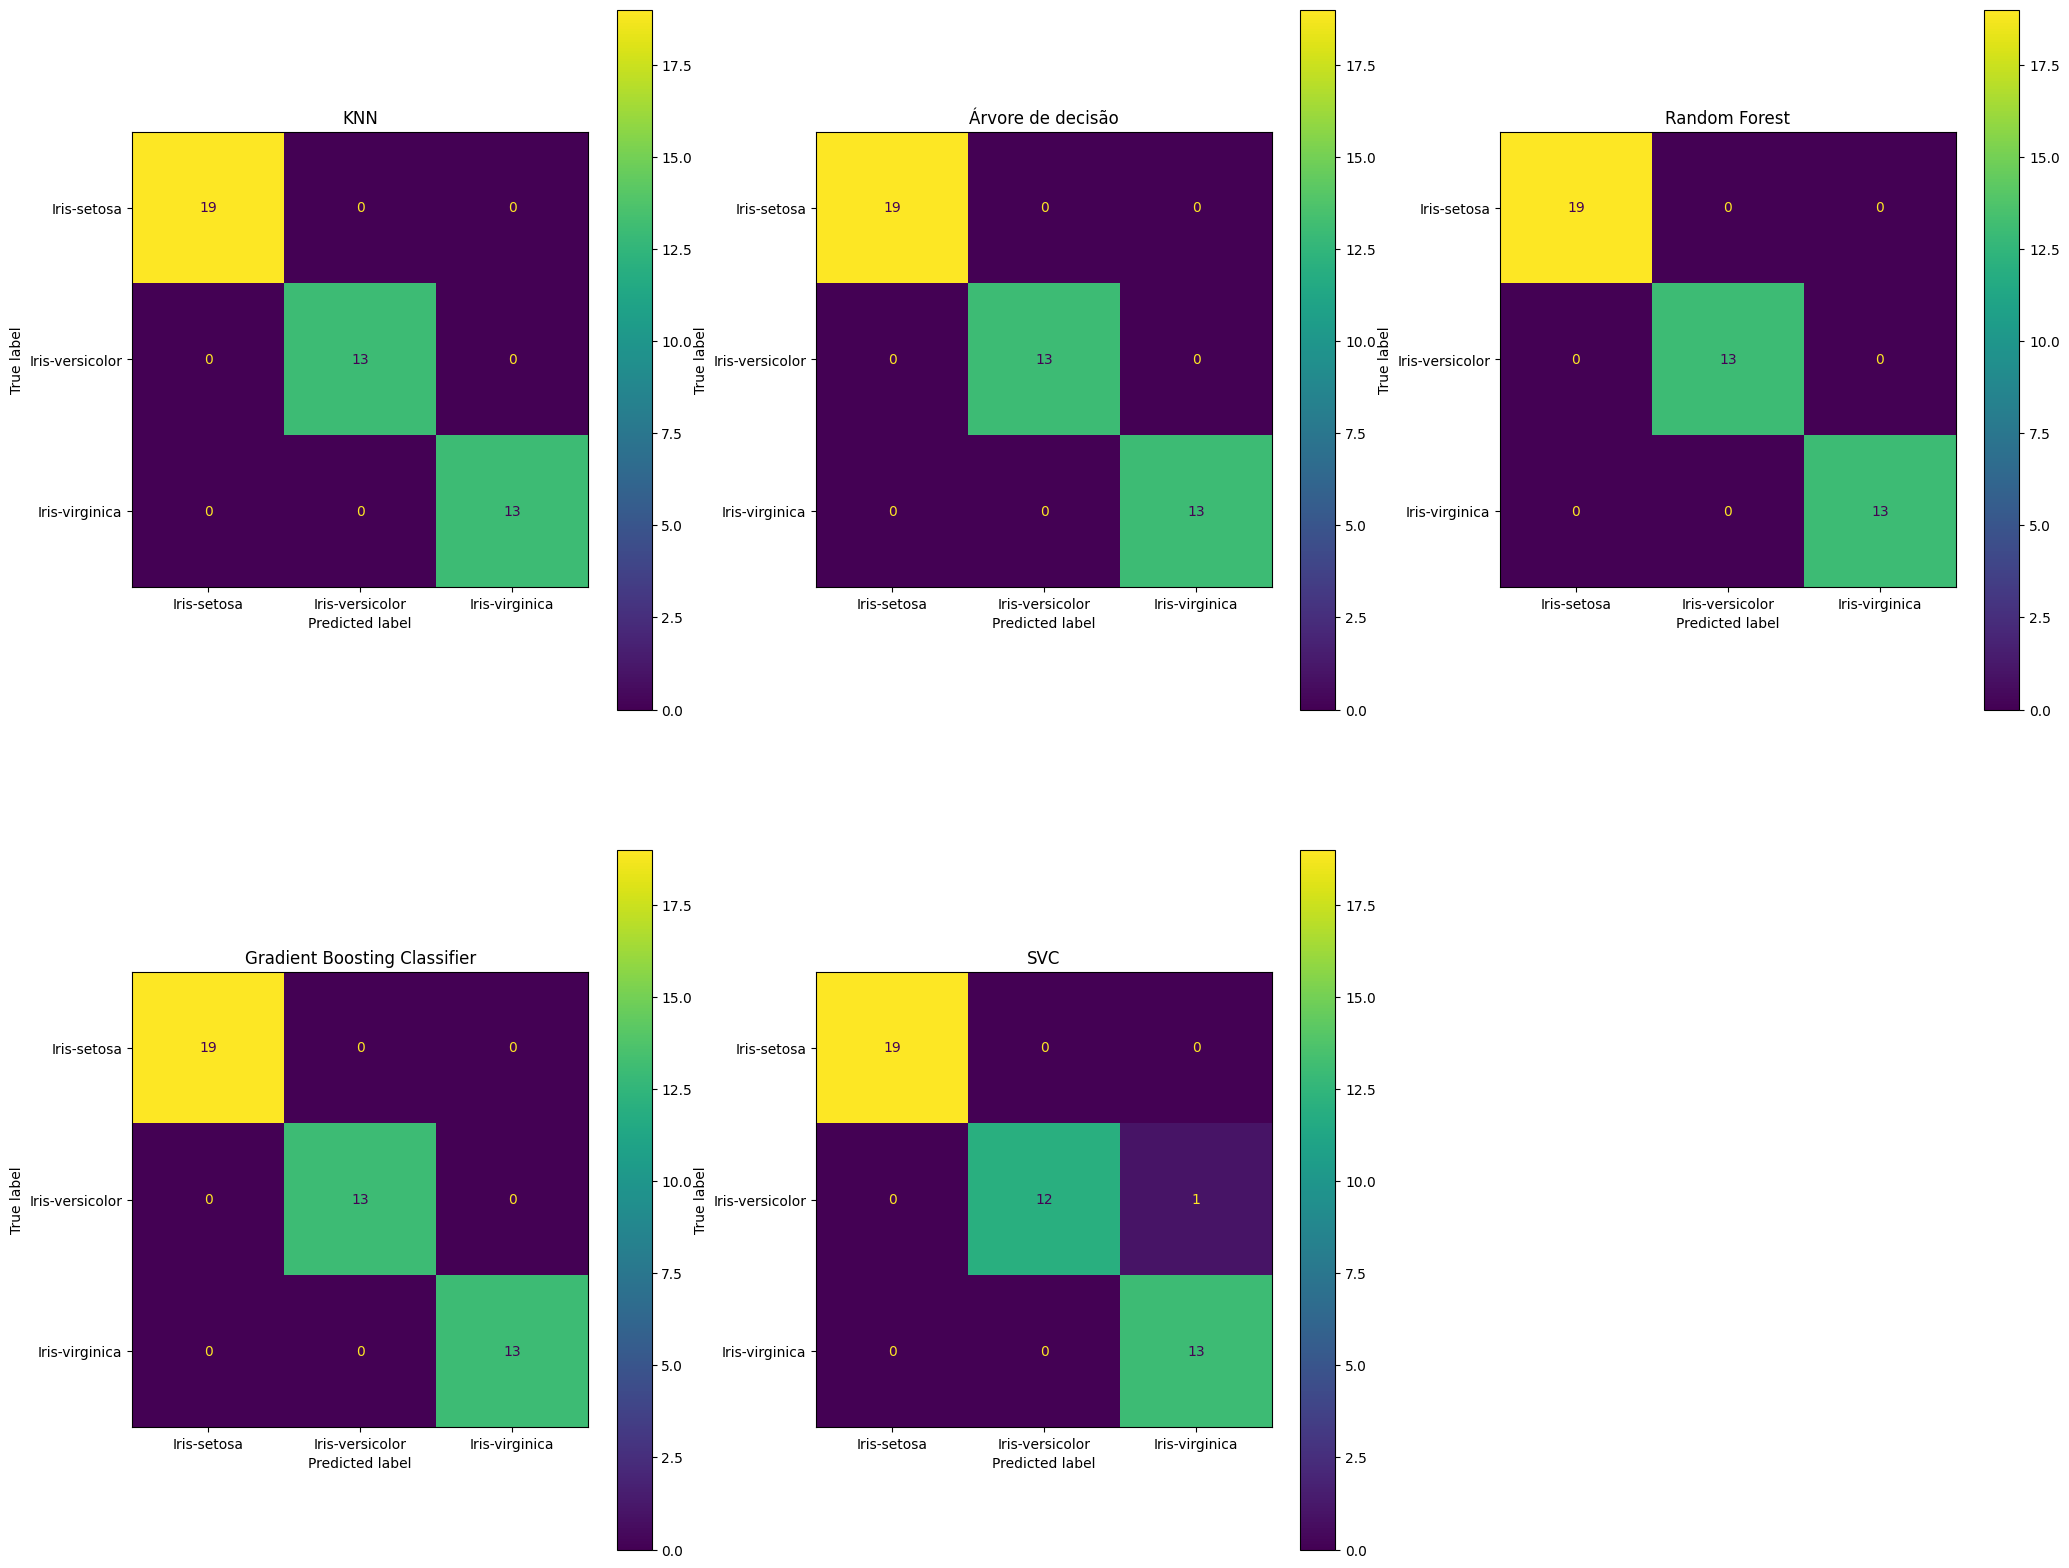

In [ ]:
linhas = 2
colunas = 3
rotulos = dados_classificacao['Species'].unique()#
figure = plt.figure(figsize=(25,20))
for i, (nome_clf, y_pred) in enumerate(predicoes_classificacao.items()):
  cm = confusion_matrix(y_true=y_test,
                        y_pred=y_pred,
                        labels=rotulos)#
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=rotulos)#
  eixo = plt.subplot(linhas,colunas,i+1)
  disp.plot(ax=eixo,
            values_format='d')
  eixo.set_title(nome_clf)

In [ ]:
# Checando métricas
for nome_clf, y_pred in predicoes_classificacao.items():
  print('='*60)
  print(nome_clf)
  print(classification_report(y_test,y_pred))

KNN
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Árvore de decisão
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Random Forest
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.0